# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 3, <font color="blue">легкая часть</font>. Линейная и логистическая регрессии.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. 
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 20 баллов;

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задачи 5-7: скачайте второй ноутбук с условием задания со страницы курса.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad3_part1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [32]:
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 146d04157c07b08ee58d3eafdcf82c32 -->
Рассмотрим модель одномерной линейной регрессии *без свободного параметра* $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

**3.** Опишите, что произойдет, если для некоторого $i$ ошибка $\varepsilon_i$ будет очень большой.


*Замечания.*
1. Это теоретическая задача, не перепутайте 😄
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитайте требования к формату решения в правилах сдачи задания.**

**Решение:**

1) $$\widehat{\theta} = (x^T x) ^ {-1} \cdot x^T \cdot Y = \frac{(x, Y)}{|x|^2} = \frac{\sum_{i=1}^{n} x_i \cdot Y_i}{\sum_{i=1}^{n} x_i^2} = \frac{\sum_{i=1}^{n} x_i \cdot (\theta x_i + \varepsilon_i)}{\sum_{i=1}^{n} x_i^2} = \frac{\sum_{i=1}^{n} \theta x_i^2 + x_i \varepsilon_i}{\sum_{i=1}^{n} x_i^2} = \theta + \frac{\sum_{i=1}^{n} x_i \varepsilon_i}{\sum_{i=1}^{n} x_i^2}.$$
Однако на лекции было только первое равенство

2) Градиентный спуск (GD):
        $$\theta_{t+1} = \theta_t - \eta X^{T}(X \theta_t - Y)=\theta_t - \eta \sum_{i=1}^n \left(x_i ^ T  \theta_t - Y_i \right)x_i$$
    где $\eta$ - шаг обучения.

    Стохастический градиентный спуск (SGD):  
    
    На итерации $t$ выбирается случайный (независимо, с повторениями) батч $B \subseteq \{1, \ldots, n\}$:
        $$\theta_{t+1} = \theta_t - \eta \sum_{i \in B} \left(x_i ^ T  \theta_t - Y_i \right)x_i.$$

3) Если $\epsilon_i$ довольно велико, то мы имеем дело с выбросом, и, при маленьком $n$, МНК сильно сдвинется. GD будет сильнее страдать, потому что с каждой иттерацией $\theta$ будет смещаться ближе к выбросу. Однако SGD будет меньше зависеть от выброса, посольку может на него не попадать. В каком-то смысле выбросы для него кратковерменны и случайны.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### Задача 2.

*Перед выполнением задачи ознакомтесь с <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">ноутбуком по линейной регрессии</a> с занятия.*

Скоро весна и лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов или самокатов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

<img src="https://thetahat.ru/files/ad/main/3/bike1.jpeg">

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [5]:
data = pd.read_csv("day.csv")
train, test = train_test_split(data, test_size=0.25)
train.reset_index(inplace=True)
train.drop('index', axis=1, inplace=True)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7e2346d718d374e3f957928b573e2a30 -->
#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

In [8]:
target_feature = 'cnt' # целевой признак
real_features = ['temp', 'atemp', 'weathersit', 'hum', 'windspeed'] # вещественные признаки,
#т.к. имеют потенциально континуум состояний
categorial_features = ['season', 'workingday', 'weekday', 'holiday', 'mnth'] # категориальные признаки, 
#т.к. имеют не более чем счетное кол-во состояний

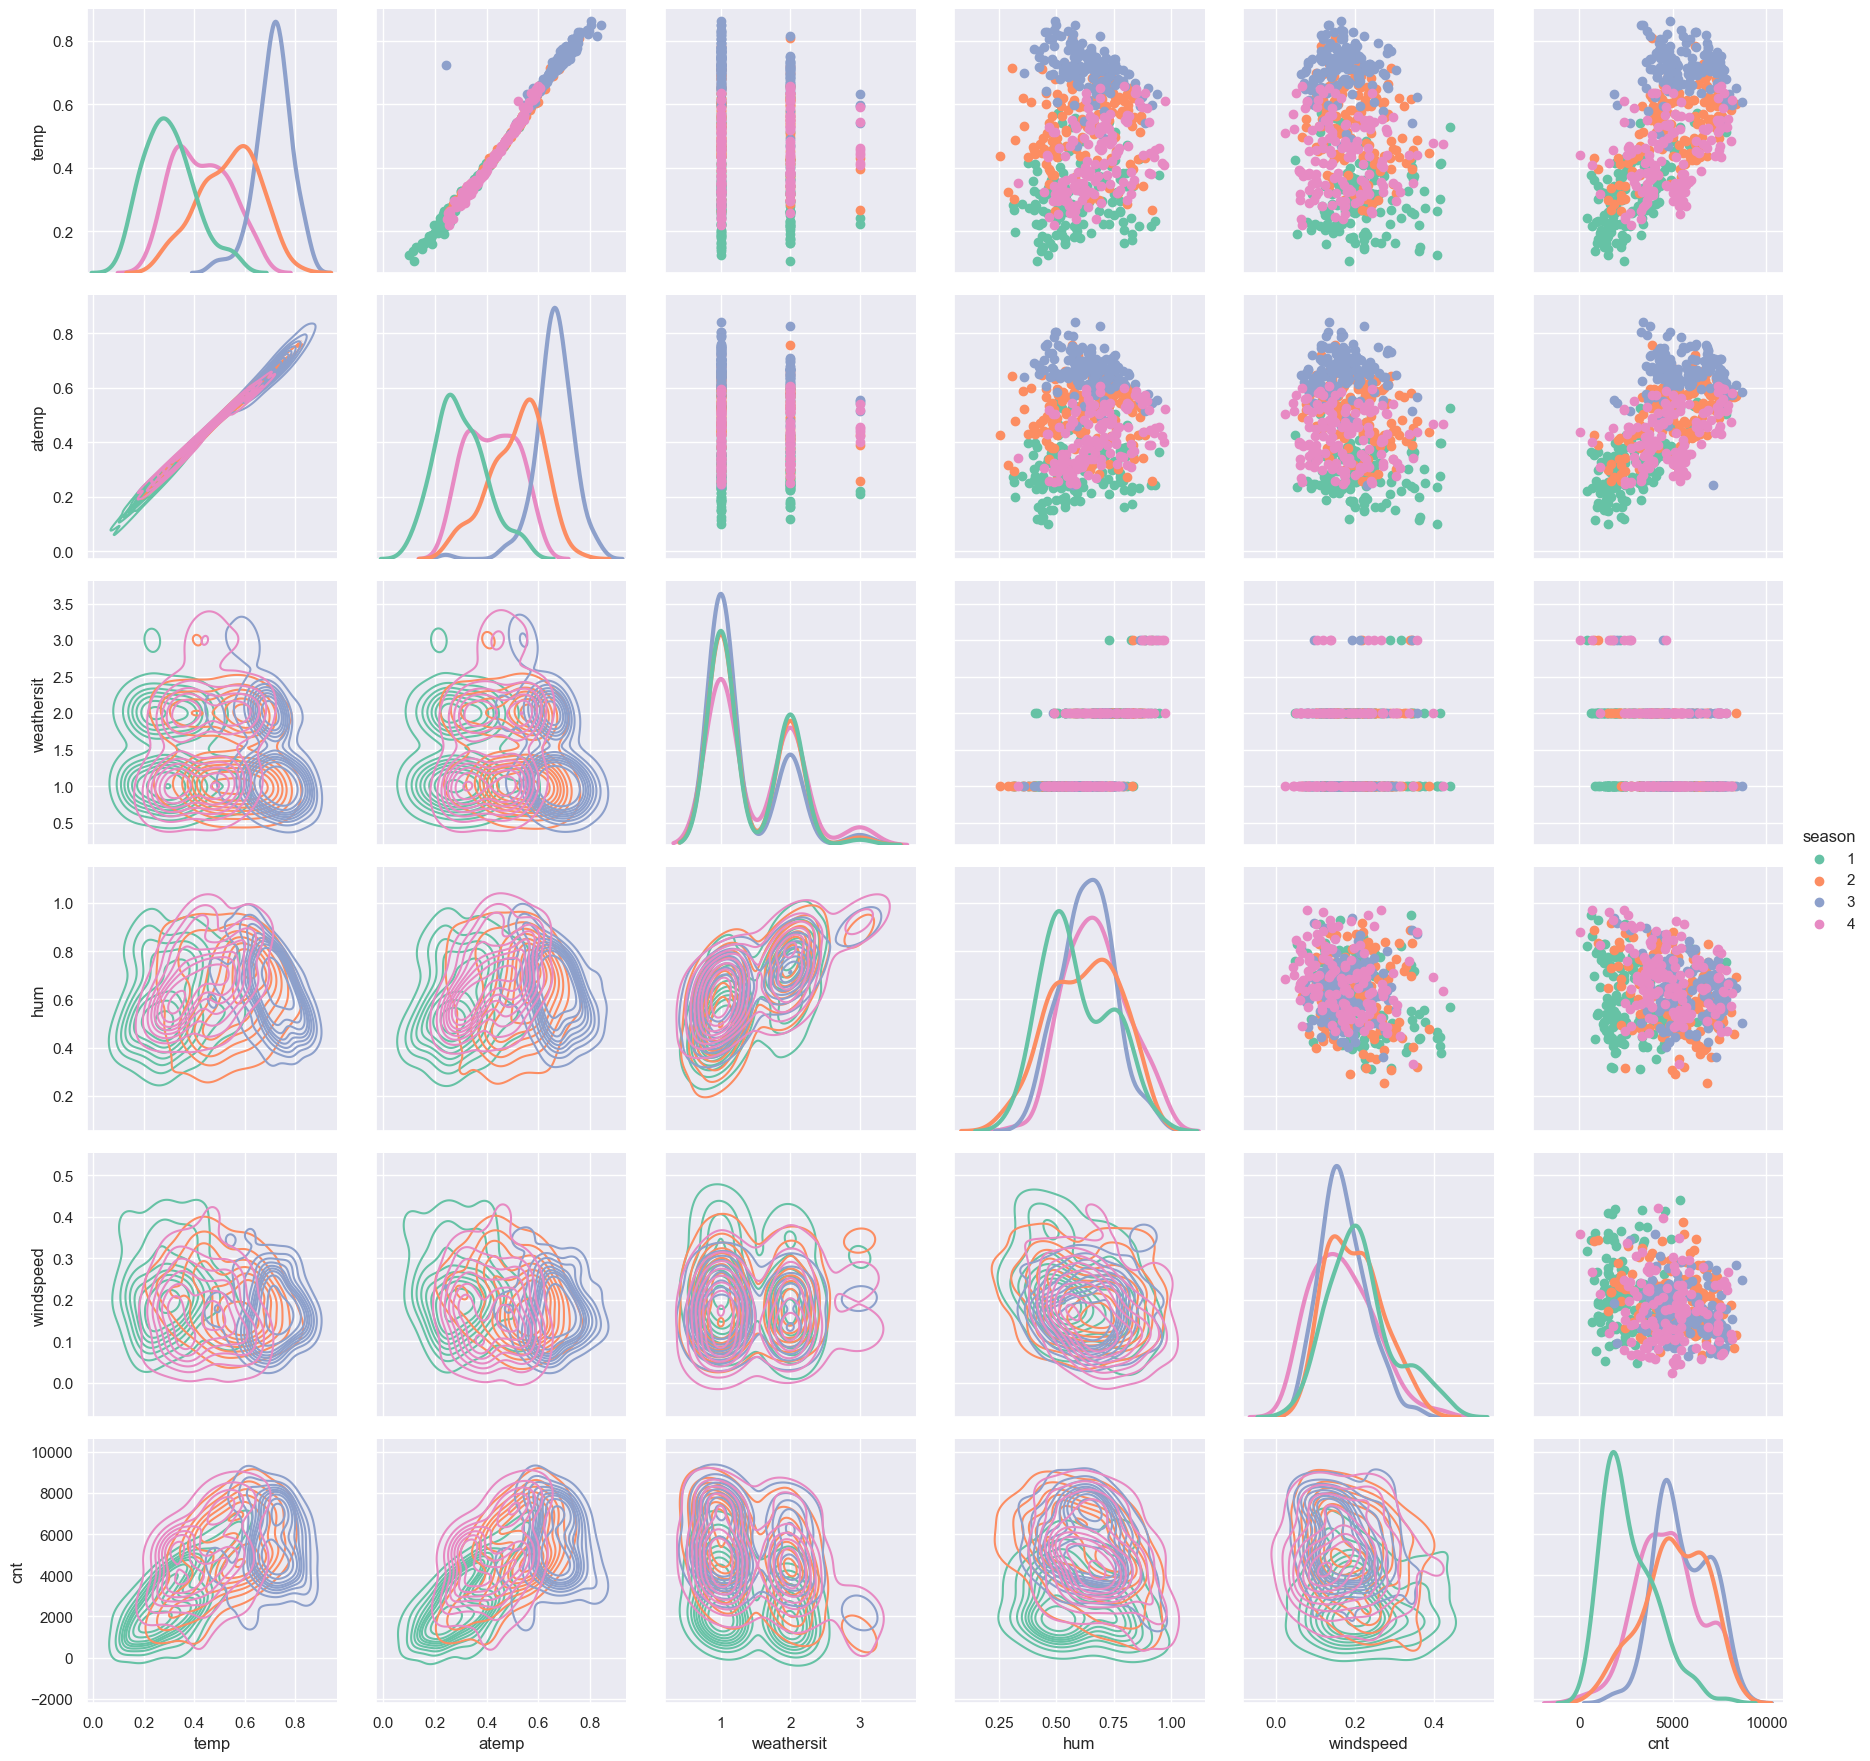

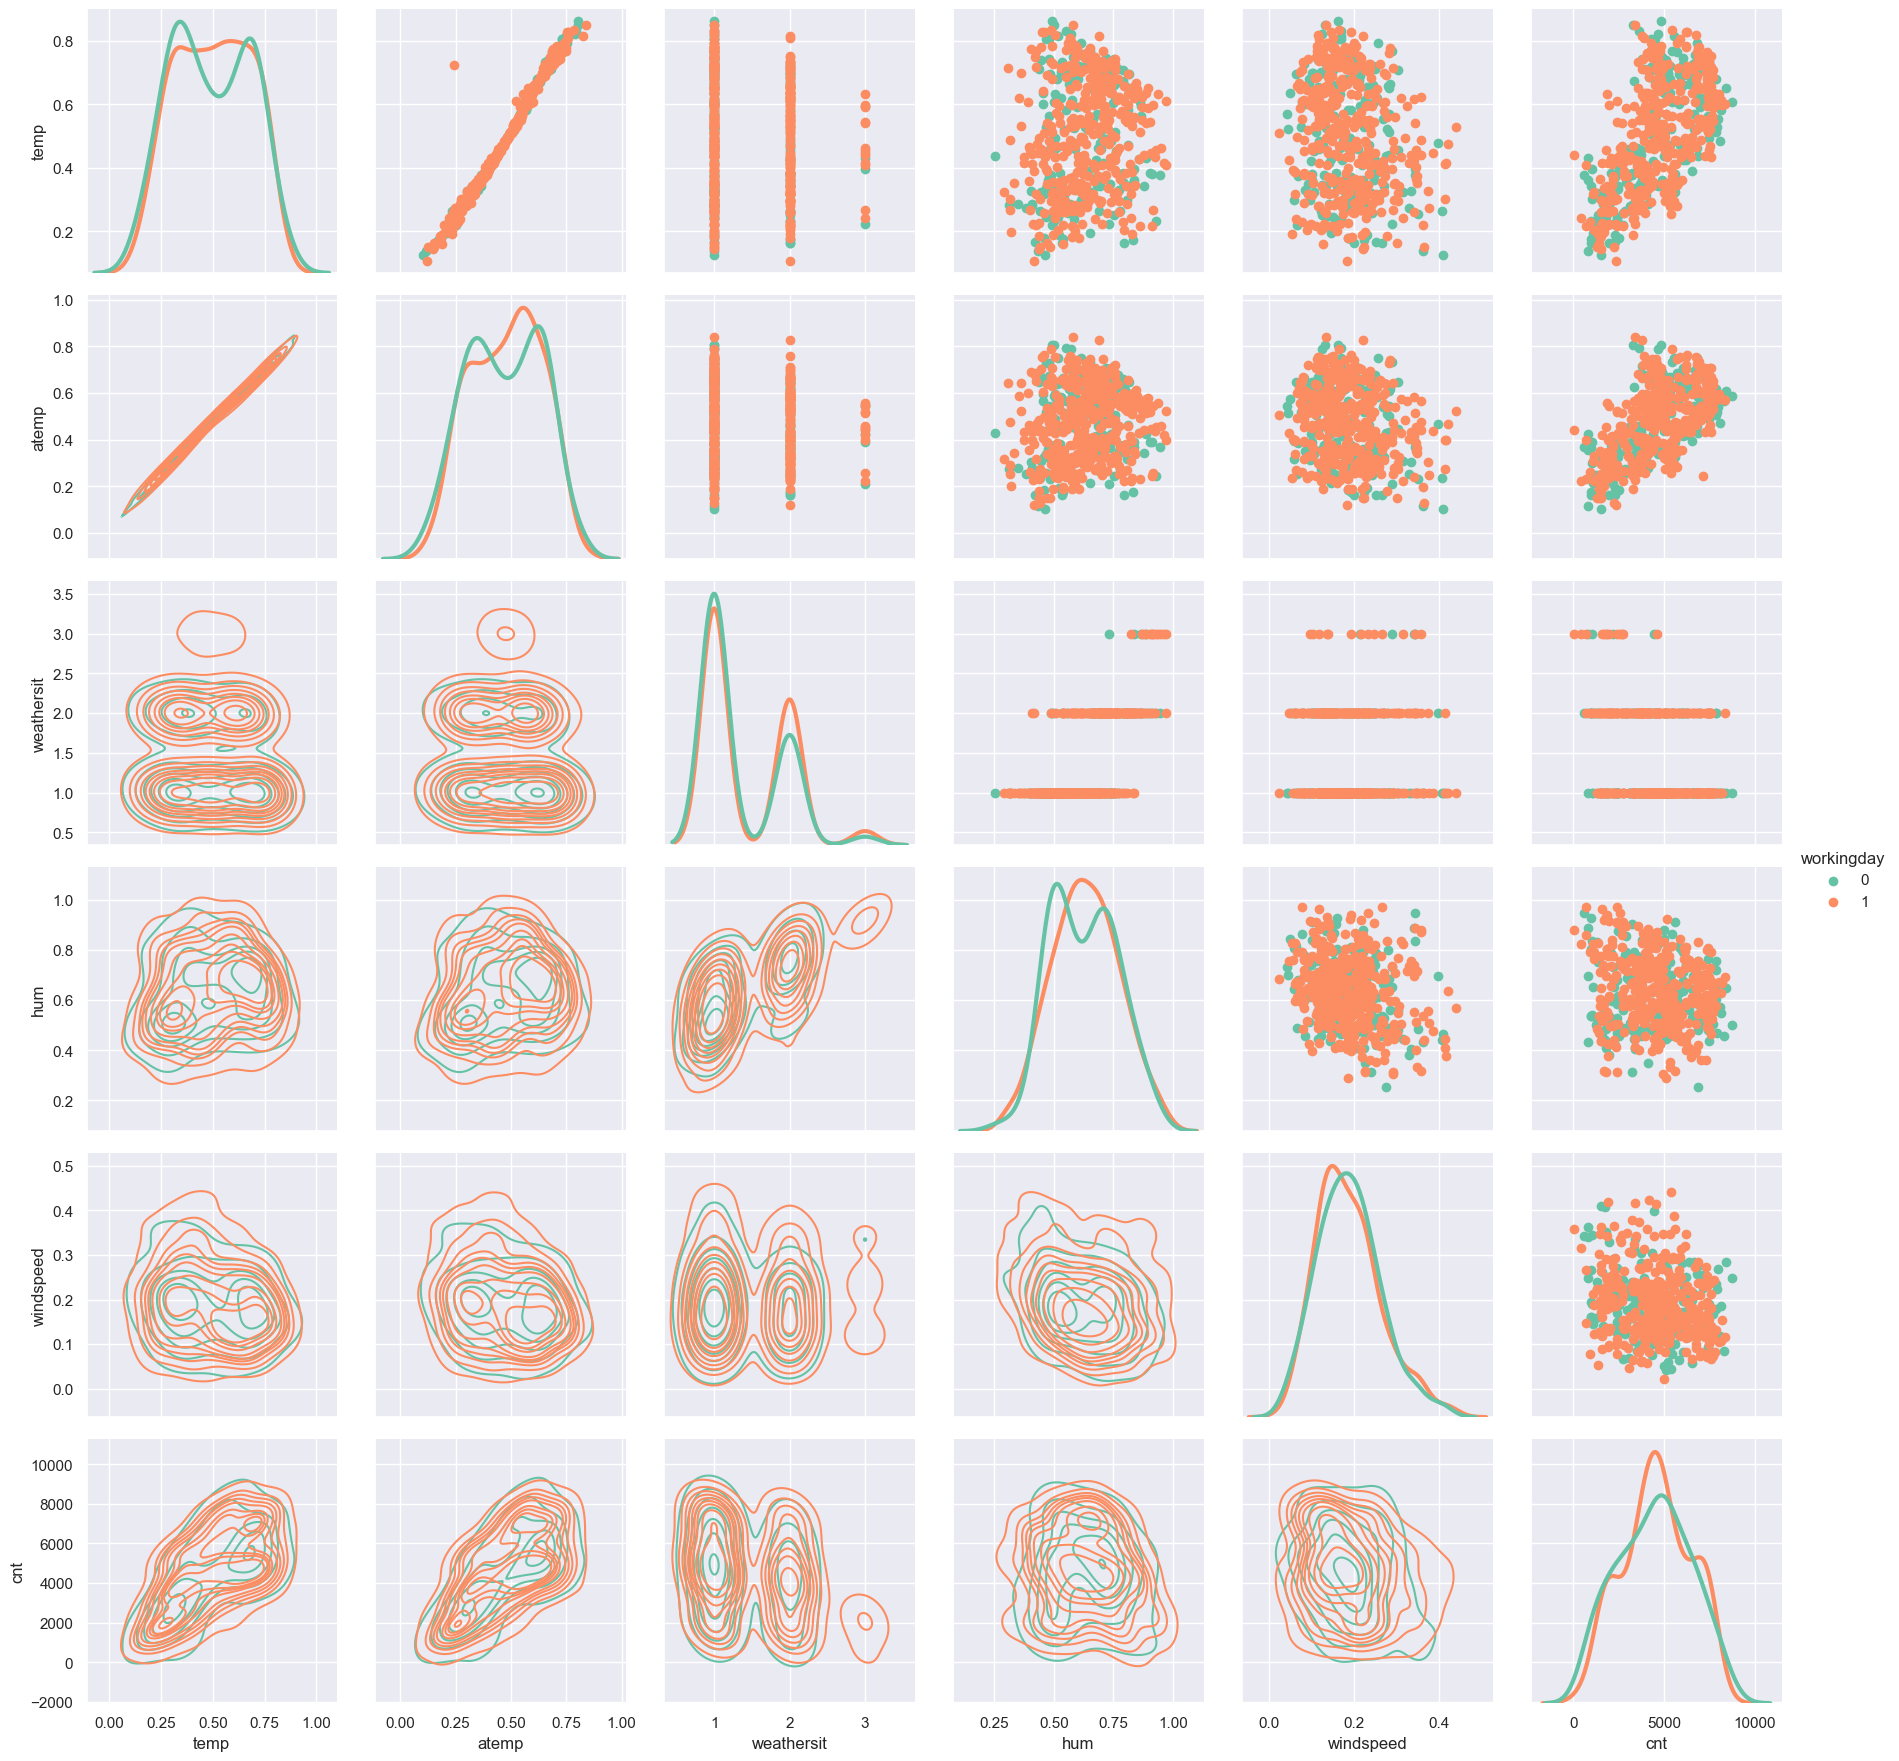

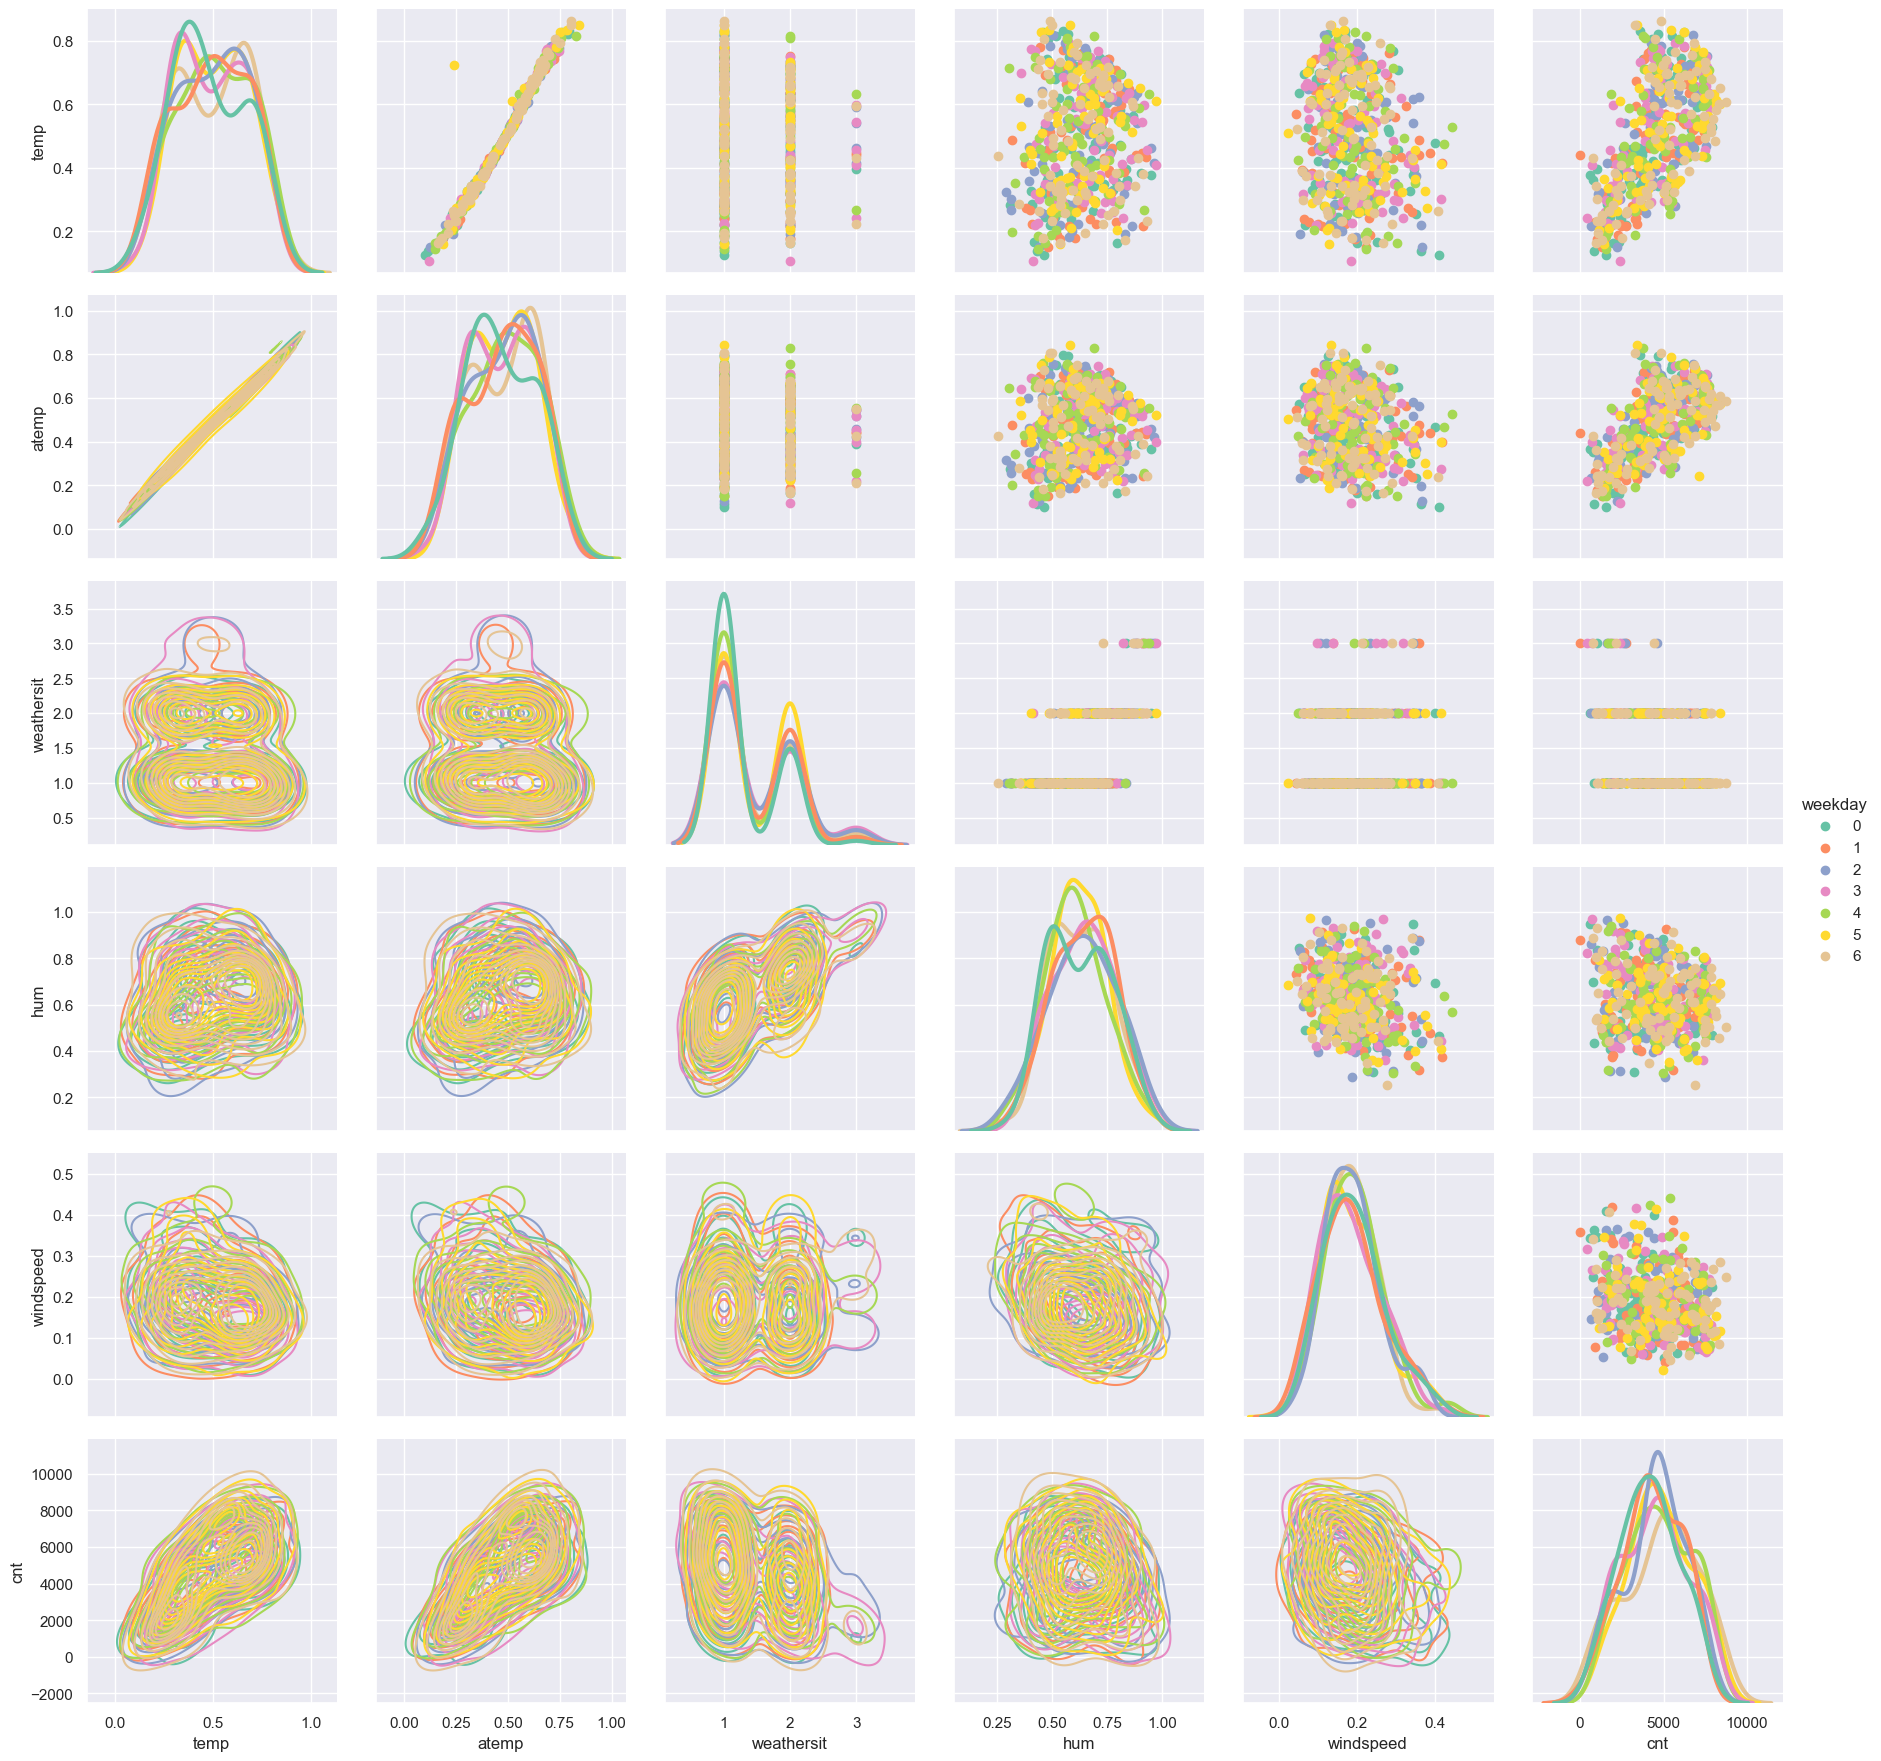

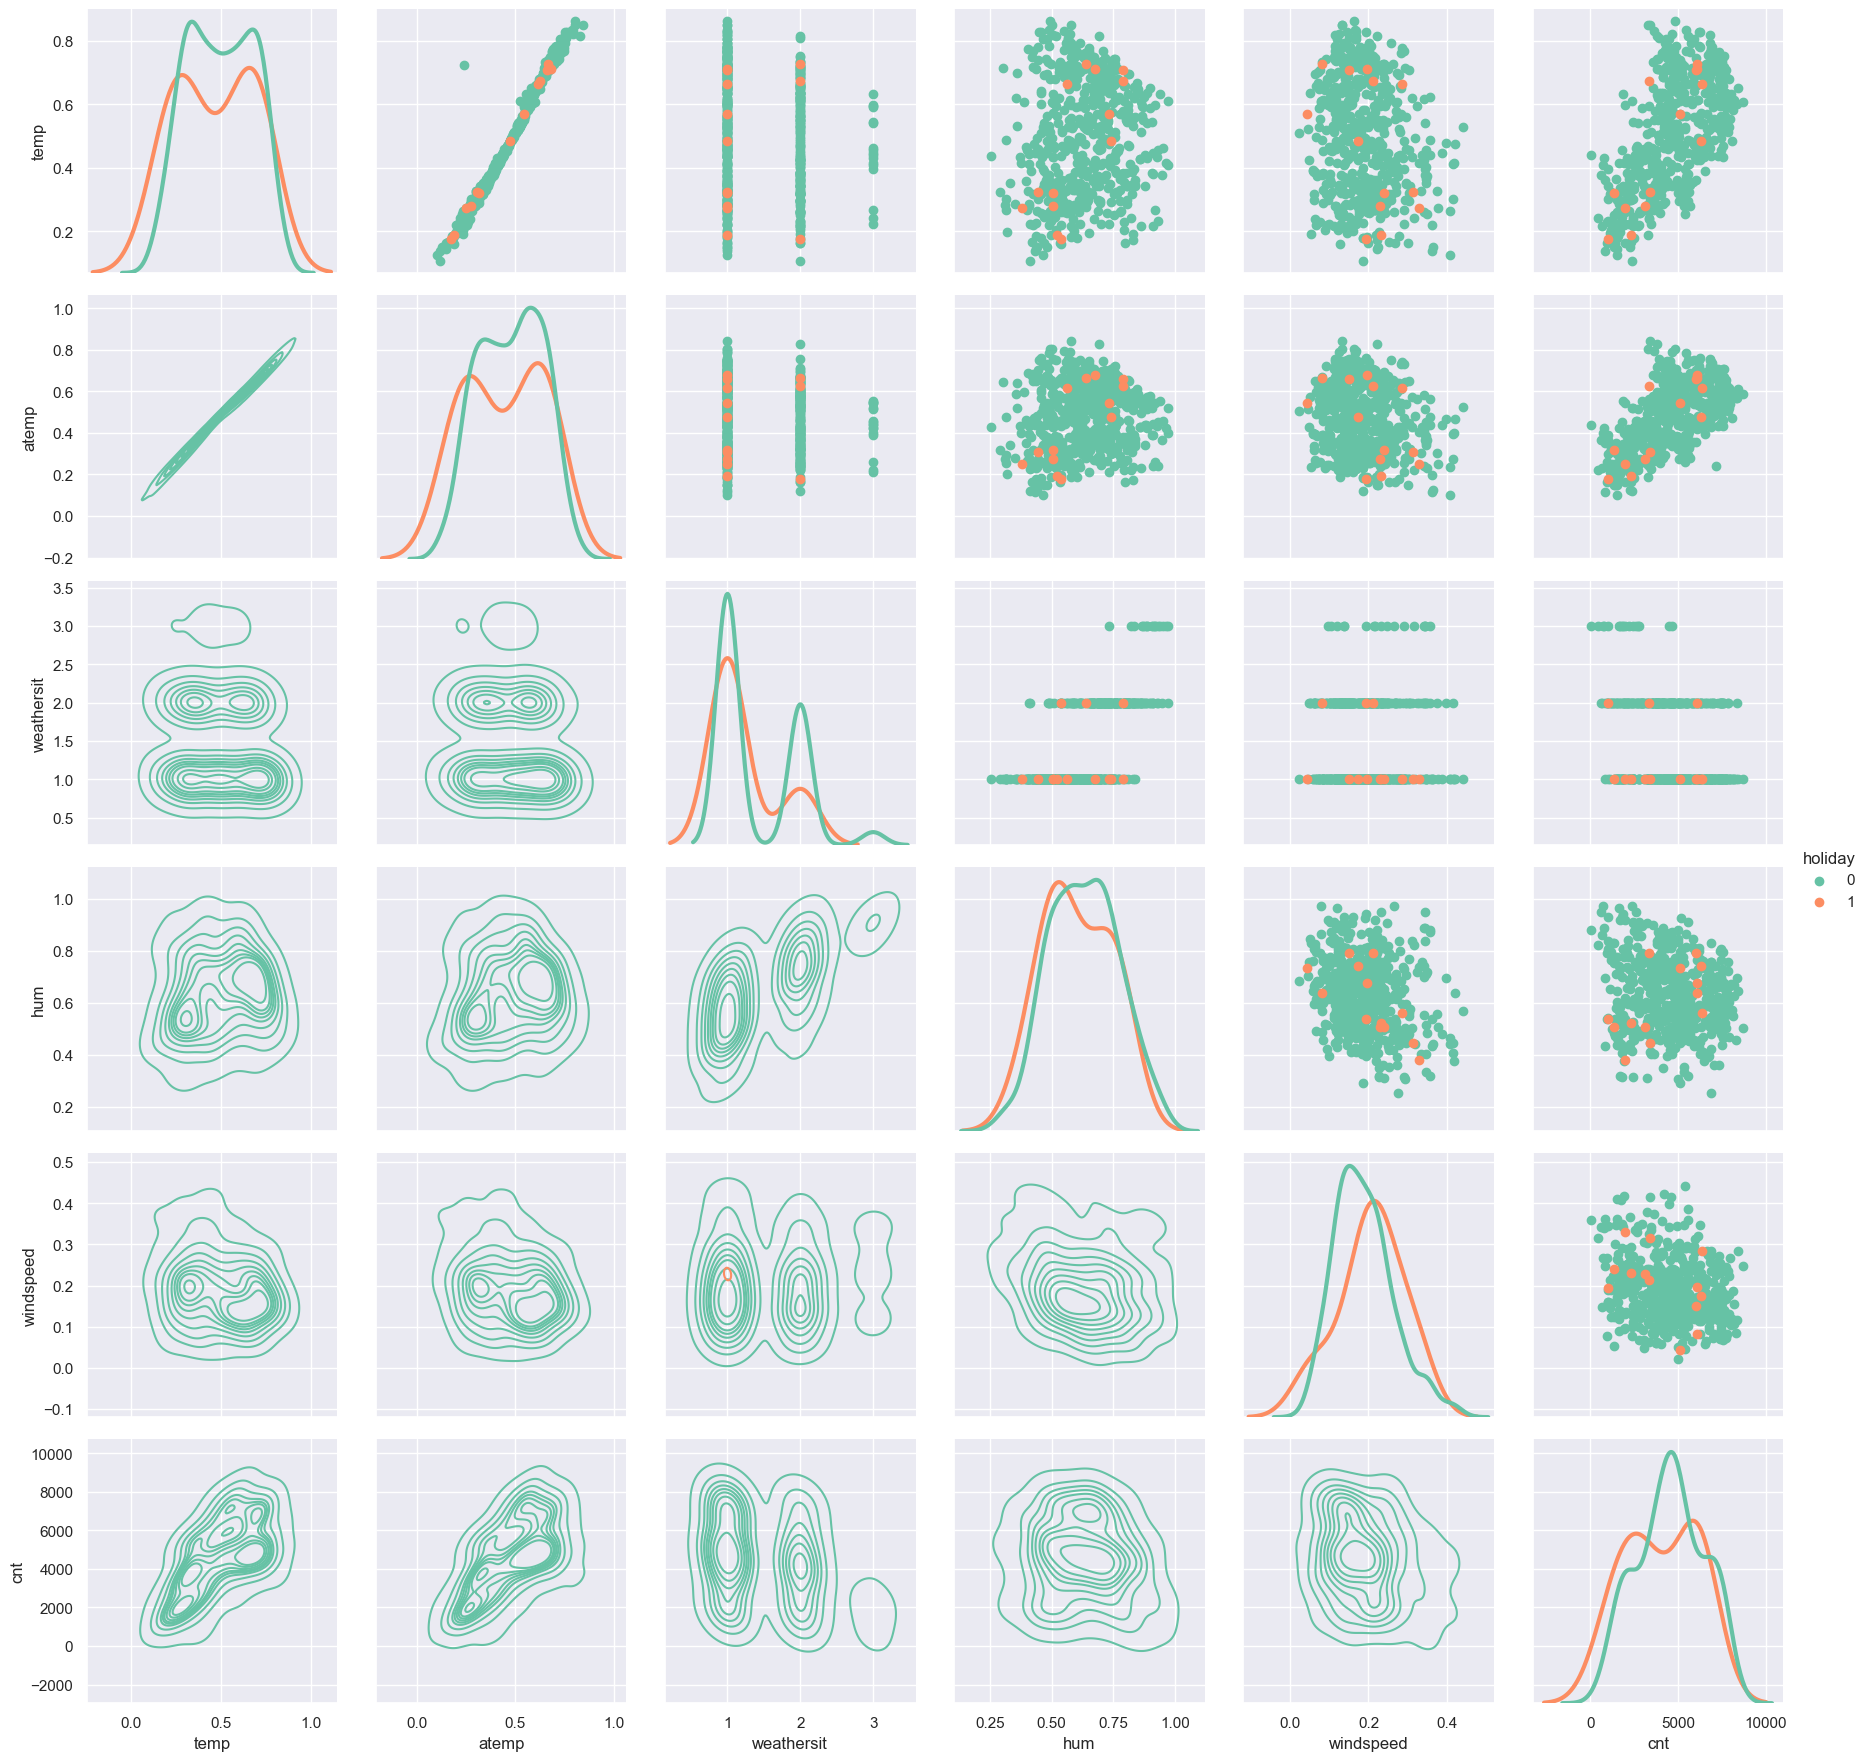

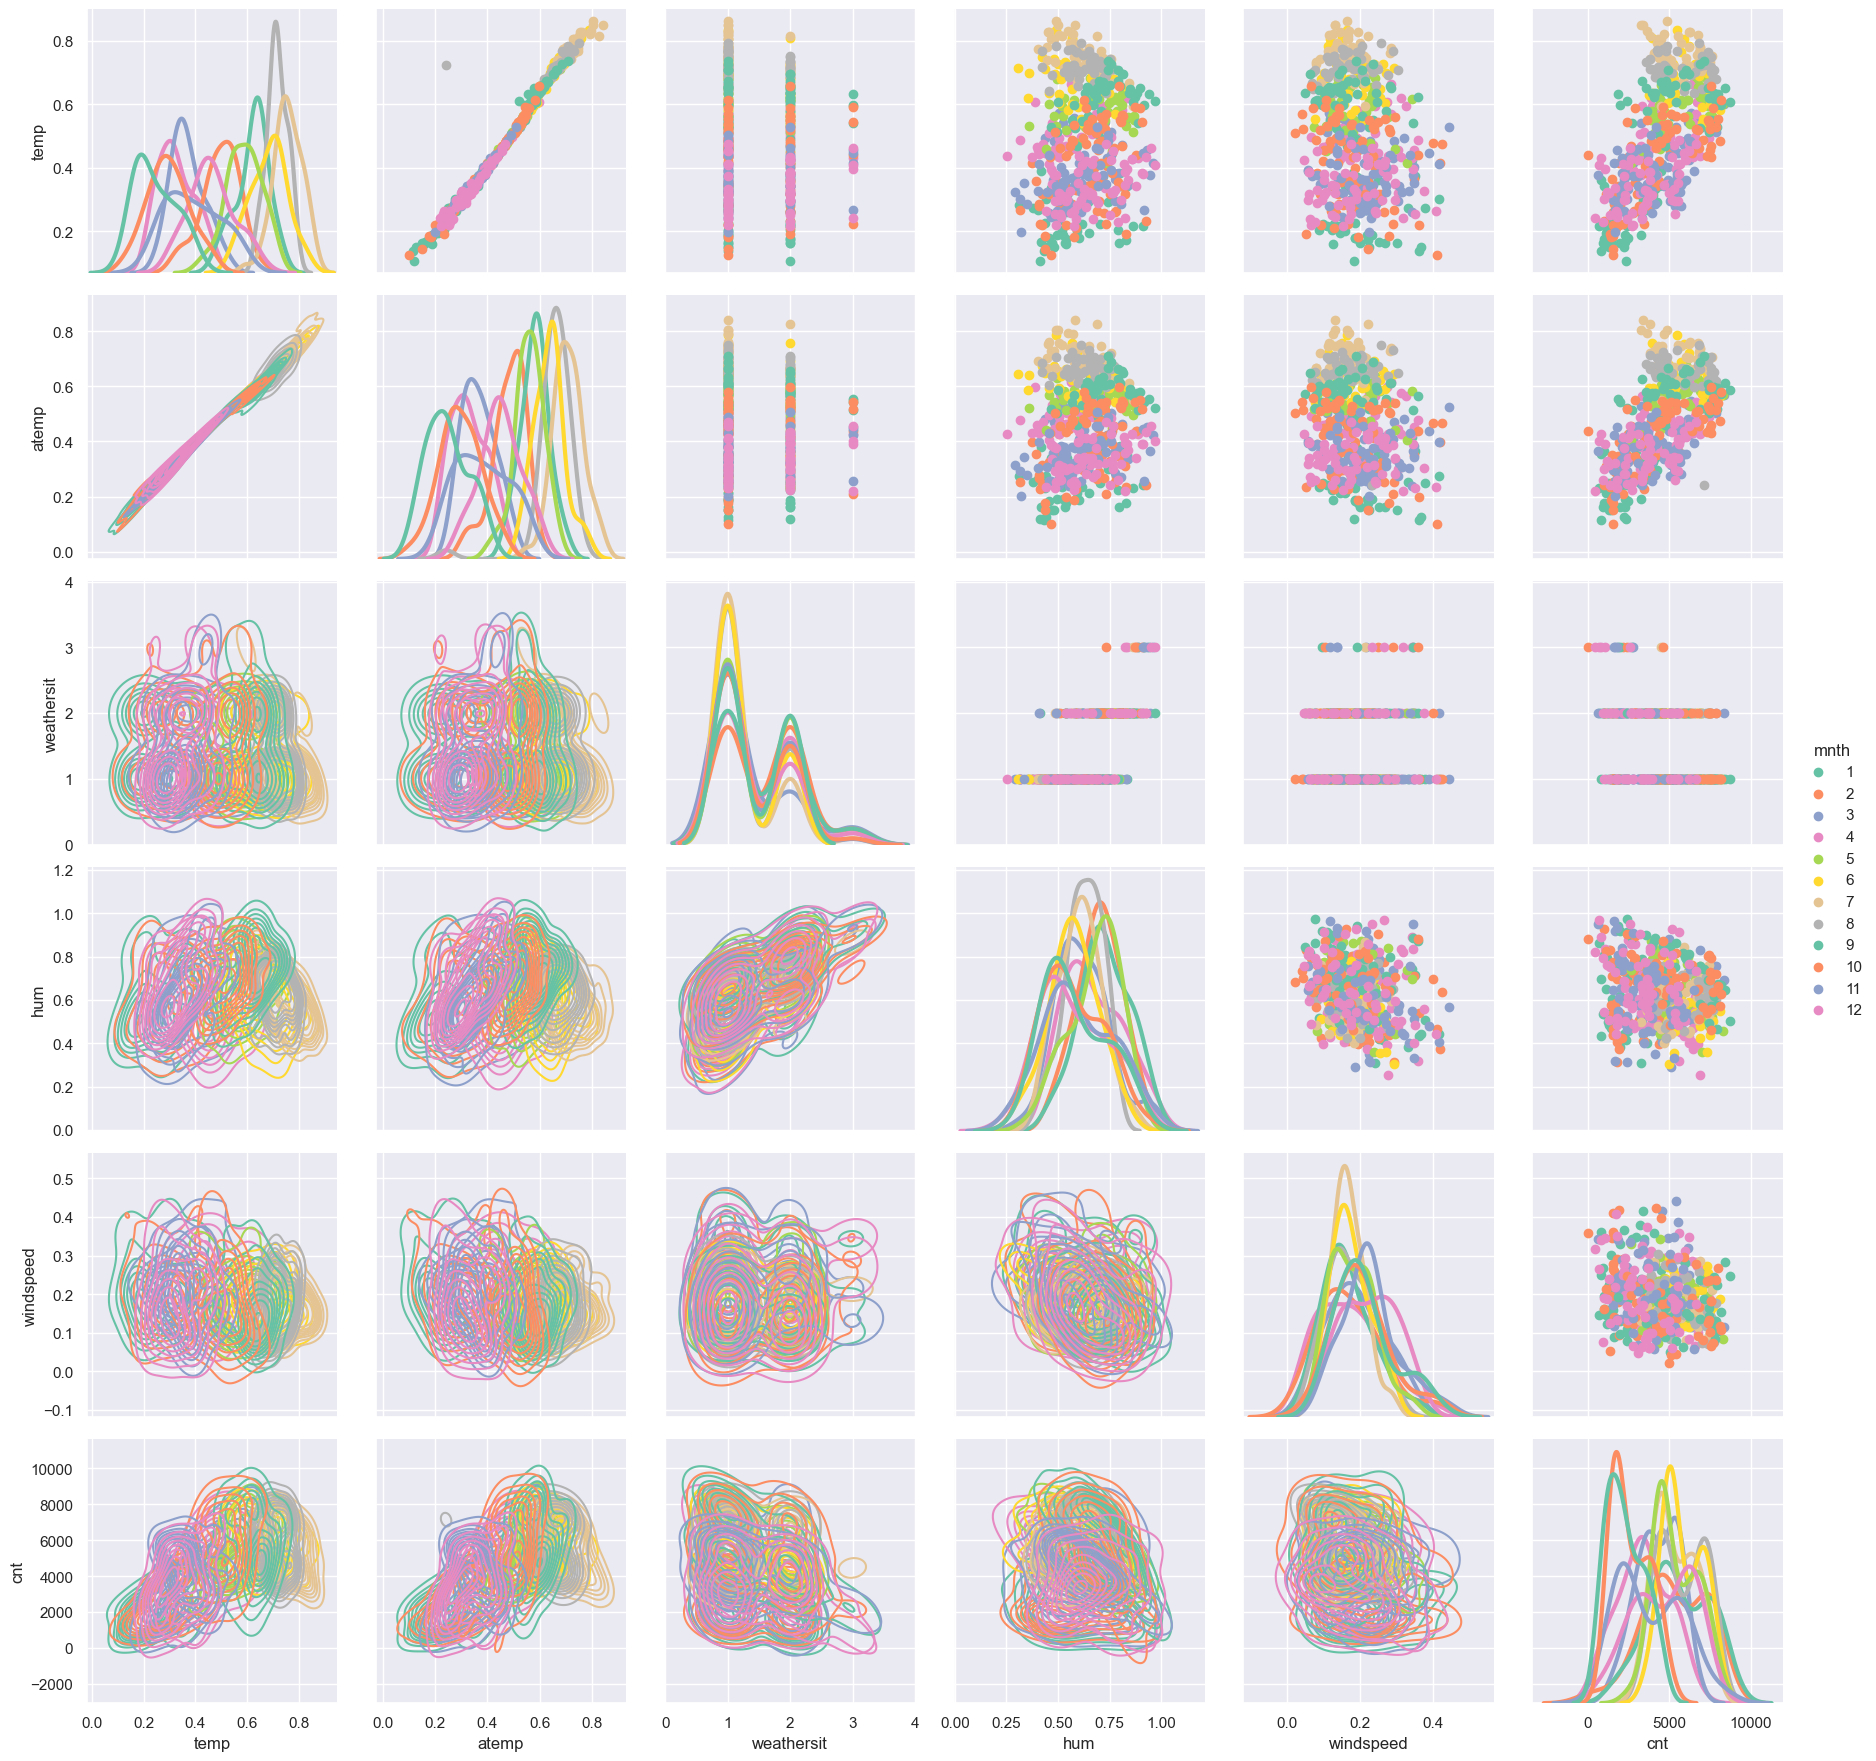

In [10]:
sns.set_style("darkgrid")
for hue in categorial_features:
    g = sns.PairGrid(train[real_features + [target_feature, ] + [hue, ]],
                     hue=hue, palette='Set2',
                     diag_sharey=False,
                     height=3)
    g.map_lower(sns.kdeplot)
    g.map_upper(plt.scatter)
    g.map_diag(sns.kdeplot, lw=3, common_norm=False)
    g.add_legend()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4c1edb365b02e434e38deeb52b2096fa -->
Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:** По графикам видно, что данные в графиках, по которым прослеживается какая-либо зависимость, расположены относительно плотно (мало выбросов). Сложные функции по типу $log(x)$ или $x^2$ нам не понадобятся, однако индикатов($I(x)$) понадобится, т.к. мы работаем с кат. признаками.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- e5fcb54a72af33e2c09b66124e63e5fc -->
#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, создание каких-либо новых признаков (посмотрите <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">пример</a> с занятия). То, как именно выполнять подготовку данных, является целым исскуством. Здесь нет "правильного" подхода, здесь есть метрика качества на тестовом множестве, которая в последствии оценит качество вашей модели.

*Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).**  уберем выбросы из real_features и изменим categorial_features в onehot encoder

Реализуйте данную процедуру.

In [12]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
train_bike = encoder.fit_transform(train[categorial_features])
X_train = np.hstack([train[real_features], train_bike])

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- c5124704b109dacbd9cf5647f50eb72c -->
#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [15]:
#обучение
model = LinearRegression(fit_intercept=True) 
model.fit(X_train, train[target_feature])

LinearRegression()

In [16]:
print("Коэфициенты модели: ", model.coef_)
print("Свободный коэфициент: ", model.intercept_)

Коэфициенты модели:  [ 6516.3535347    651.96049528  -388.96918815 -3489.74174682
 -3730.54803223   982.81449367   593.36059339  1628.30167877
   272.3072879    -47.57466379    14.19174935   -13.76414457
    79.90830131   222.65607281   647.54673216   -16.88997279
   -72.49644814   275.25796327  -166.69773939  -122.93671948
  -723.56885142 -1325.05116222  -551.10128962    44.68096353
   -58.15680247  -475.42380499  -365.07734474]
Свободный коэфициент:  3631.9267462071452


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 0e8e860f57fc7df75f236442f7206c78 -->
Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. Особенно стоит обратить на это внимание в случае высоких значений метрик.

In [17]:
test_bike = encoder.transform(test[categorial_features])
X_test = np.hstack([test[real_features], test_bike])
test_preds = model.predict(X_test)

In [19]:
#MSE 
print(metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5)
#MAE
print(metrics.mean_absolute_error(test[target_feature], test_preds))
#MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

mean_absolute_percentage_error(test[target_feature], test_preds)

1389.569051218922
1182.2672139781287


np.float64(41.143501704375616)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 82920a034ed2865f8a7e2f03eaabceb6 -->
Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками. Причем, возможно, вы уже могли решить эту проблему на предыдущих этапах. В таком случае посмотрите, что будет, если "вернуть" проблему.

Проблема заключается в том, что столбцы матрицы могут быть сильно ЛЗ => матрица вырождена и МНК не работает

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 56aff27d604dbe90dda7b28a8da4e2e9 -->
Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [27]:
def delete_blowout(targer, hue):
  Q1 = np.percentile(targer[hue], 25, interpolation='midpoint')
  Q3 = np.percentile(targer[hue], 75, interpolation='midpoint')
  IQR = Q3 - Q1
  upper = np.where(targer[hue] >= (Q3 + 1.5 * IQR))
  lower = np.where(targer[hue] <= (Q1 - 1.5 * IQR))
  if len(upper) > 0: 
    targer.drop(upper[0], inplace=True, axis=0)
  if len(lower) > 0:
    targer.drop(lower[0], inplace=True, axis=0)

for hue in real_features:
    delete_blowout(train, hue)

/var/folders/r1/1y7kwnsn7hs3y_cdn4lt2ks80000gn/T/ipykernel_74021/4180823902.py:13: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  delete_blowout(train, hue)
/var/folders/r1/1y7kwnsn7hs3y_cdn4lt2ks80000gn/T/ipykernel_74021/4180823902.py:13: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  delete_blowout(train, hue)
/var/folders/r1/1y7kwnsn7hs3y_cdn4lt2ks80000gn/T/ipykernel_74021/4180823902.py:13: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' ar

In [28]:
target_feature = 'cnt'
categorial_features = ['season', 'workingday', 'weekday', 'holiday', 'mnth', ]
real_features = ['atemp', 'hum', 'windspeed']
encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(train[categorial_features])
X_train = np.hstack([train[real_features], train_cat])
model = LinearRegression(fit_intercept=True)
model.fit(X_train, train[target_feature])
model.coef_, model.intercept_

(array([ 7.51161554e+03, -4.63401870e+03, -4.11335105e+03,  9.49769675e+02,
         5.84554882e+02,  1.57838100e+03,  2.31693804e+02, -3.33245760e+01,
         1.50762653e+01, -4.95089034e+00,  8.54374243e+01,  2.38052875e+02,
         6.41598505e+02,  6.85972943e+01, -2.07868044e+01,  3.46267900e+02,
        -4.84227291e+01,  1.55667580e+02, -3.88744594e+02, -1.01227666e+03,
        -1.31854356e+02,  3.77483170e+02,  1.22523692e+02, -3.28657112e+02,
        -2.59887780e+02]),
 np.float64(3696.0300565228117))

In [29]:
test_bike = encoder.transform(test[categorial_features])
X_test = np.hstack([test[real_features], test_bike])
test_preds = model.predict(X_test)
#MSE 
print(metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5)
#MAE
print(metrics.mean_absolute_error(test[target_feature], test_preds))
#MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

mean_absolute_percentage_error(test[target_feature], test_preds)

1413.2695482213571
1181.3112045274468


np.float64(41.9950885588985)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 52266029600cdfda3b1cfce9e68f5c99 -->
Сделайте выводы.

**Выводы:**
К сожалению, MAPE увеличился, что свидетельствует о том, что как-то неверно видимо обрабатываются данные или же выбросы каким-то образом смогли отнормировать результат в лучшую сторону. К тому же вероятно выбросов много и стоит рассматривать более сложные модели для данных, которые расположены не так уж и плотно или линейно. Так же стоит отметить, что возможно параметры между собой связаны, однако это тяжело отследить. Идейно мы обучились использовать модель лин. регрессии и осознали, что она может быть не лучшей моделью. Или же нужно лучше выбирать признаки.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

<img src="https://thetahat.ru/files/ad/main/3/bike2.png">

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2c0205cf5ab3ec02c6ea667faa01e48b -->
---
### Задача 3.

*Перед выполнением задачи ознакомтесь с <a href="https://thetahat.ru/courses/ad/main/3/ad_logreg_sklearn">ноутбуком по логистической регрессии</a> с занятия.*

> Одно из интересных свойств модели логистической регрессии — *при соблюдении её предположений* она дает возможность получать **несмещенные оценки вероятностей** принадлежности объекта к определенному классу.  
> Для пояснения рассмотрим объект $x$ и соответствующее предсказание вероятности $\widehat{p}(x)$ для класса 1. Если взять небольшую окрестность объекта $x$, то доля объектов класса 1 в этой окрестности будет приблизительно равна $\widehat{p}(x)$.  

Далее проверим это свойство на конкретных примерах.

С помощью кода ниже сгенерируйте данные, состоящие из одного вещественного признака и бинарного таргета.

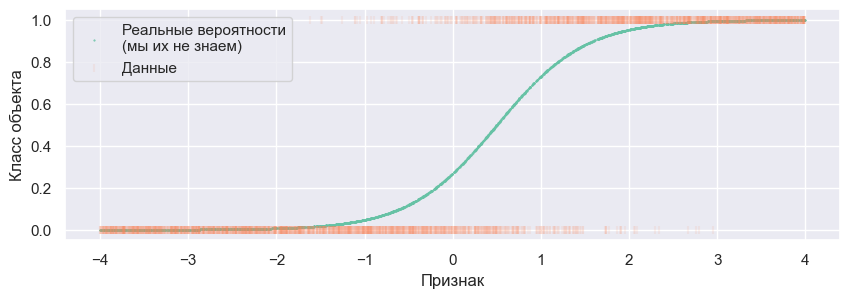

In [55]:
sample_size = 3000  # Размер выборки

# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(1 - 2 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности\n(мы их не знаем)")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();

Обучите логистическую регрессию, используя реализацию из `sklearn`, при этом свободный коэффициент должен присутствовать в модели. Укажите также `penalty='none'`.

In [56]:
model = LogisticRegression(penalty=None)


Напечатайте оценку коэффициентов

In [57]:
model.fit(X, y)
print("Коэфициенты модели: ", model.coef_)
print("Свободный коэфициент: ", model.intercept_)

Коэфициенты модели:  [[2.01860623]]
Свободный коэфициент:  [-1.02619753]


Ниже объявлена сетка значений признака. По этой сетке постройте
* предсказания классов,
* предсказания вероятностей класса 1.

Визуализируйте эти предсказания. На график стоит нанести также обучающую выборку.

Text(0.5, 1.0, 'Сравнение реальных и предсказанных вероятностей')

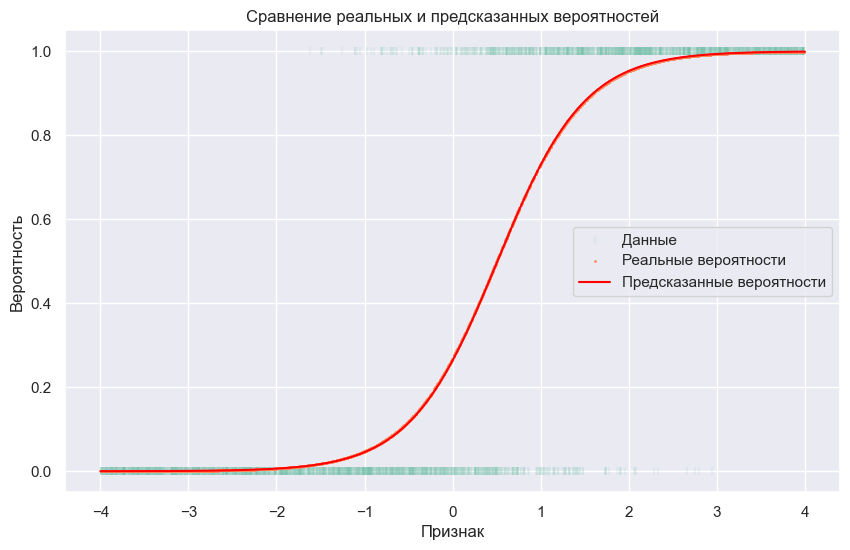

In [58]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))
y_proba = model.predict_proba(X_grid)[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.scatter(X, y_mean_true, s=1, label="Реальные вероятности")
plt.plot(X_grid, y_proba, color="red", label="Предсказанные вероятности")
plt.legend()
plt.xlabel("Признак")
plt.ylabel("Вероятность")
plt.title("Сравнение реальных и предсказанных вероятностей")


Разбейте отрезок $[-4, 4]$ на одинаковые бины длины длины 0.2 и посчитайте в каждом бине долю объектов класса 1. Полученные значения добавьте на график предсказаний вероятностей и сравните эти графики. Проинтерпретируйте полученные результаты.

*Подсказка:* может помочь `np.digitize` и метод `groupby` для таблиц `pandas`. Рекомендуем посмотреть <a href="https://thetahat.ru/courses/python">обучающие ноутбуки</a> по библиотекам.

Text(0.5, 1.0, 'Распределение вероятностей по бинам')

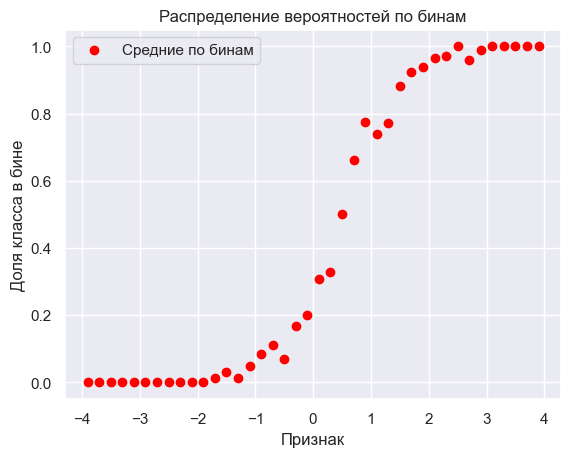

In [59]:
bins = np.arange(-4, 4.2, 0.2)
df = pd.DataFrame({"X": X.ravel(), "y": y})
df["bin"] = np.digitize(df["X"], bins)
bin_means = df.groupby("bin")["y"].mean()
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.scatter(bin_centers, bin_means, color="red", label="Средние по бинам")
plt.legend()
plt.xlabel("Признак") 
plt.ylabel("Доля класса в бине")
plt.title("Распределение вероятностей по бинам")


Повторите проведенное исследование для следующих данных и сравните результаты.

Коэфициенты модели:  [[56.70677731]]
Свободный коэфициент:  [0.11783424]


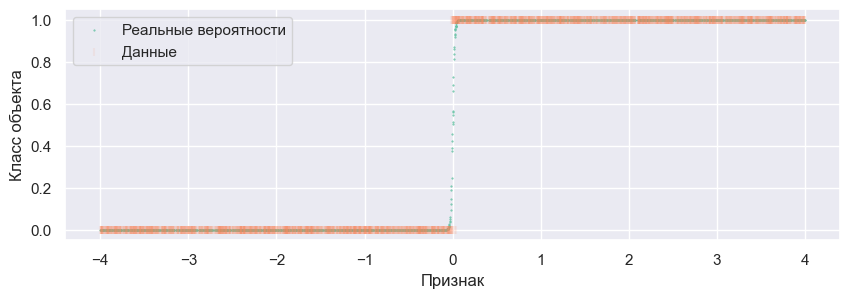

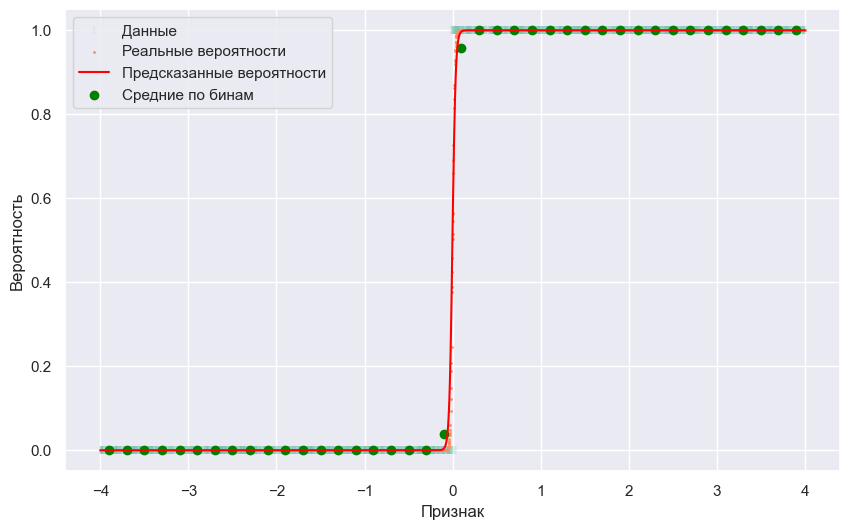

In [63]:
# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(-100 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();
model = LogisticRegression(penalty=None)
model.fit(X, y)
print("Коэфициенты модели: ", model.coef_)
print("Свободный коэфициент: ", model.intercept_)
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))
y_proba = model.predict_proba(X_grid)[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.scatter(X, y_mean_true, s=1, label="Реальные вероятности")
plt.plot(X_grid, y_proba, color="red", label="Предсказанные вероятности")
bins = np.arange(-4, 4.2, 0.2)
df = pd.DataFrame({"X": X.ravel(), "y": y})
df["bin"] = np.digitize(df["X"], bins)
bin_means = df.groupby("bin")["y"].mean()
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.scatter(bin_centers, bin_means, color="green", label="Средние по бинам")
plt.xlabel("Признак")
plt.ylabel("Вероятность")  # Корректное описание оси Y

plt.legend()


**Выводы:**
В первом случае, данные по сигмоиде, поэтому есть явная линейная зависимость между признаком и логитом, плэтому у нас там все плавно и модель хорошо все предсказала. Во втором же случае у нас более ступенчатая функция, поэтому почти нет линейной зависимости между логитом и признаком. Этот пример явно указывает на ограничение лог. регрессии - зависимость должна быть близка к линейной. 

---
### Задача 4.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- f92a2876d3f2b0d01fc396776be023a9 -->
Продолжим исследовать модель логистической регрессии. Сгенерируем данные, состоящие из двух бинарных признаков и бинарного таргета

In [72]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

x = np.random.choice(np.arange(8), p=probs, size=10000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype=">i8").view(np.uint8), axis=1)[:, -3:],
    columns=["feature_1", "feature_2", "target"],
)
data.head()

feature_1  feature_2  target
0          0          1       1
1          1          1       0
2          1          1       1
3          0          0       1
4          0          0       0

Особенность таких данных &mdash; конечное число *возможных различных* объектов. В данном случае их всего 4, по количеству всех возможных комбинаций значений признака. Соответственно, любой моделью мы можем сделать только 4 *различных* предсказания. Исследуем, как с этим справляется логистическая регрессия.

Сначала для сравнения посчитайте долю класса 1 для каждой категории объектов.

*Подсказка:* используйте `pd.pivot_table`. Рекомендуем посмотреть <a href="https://thetahat.ru/courses/python">обучающие ноутбуки</a> по библиотекам.

In [73]:
frequency_table = pd.pivot_table(
    data, 
    values='target', 
    index=['feature_1', 'feature_2'], 
    aggfunc='mean'
).reset_index()
frequency_table.columns = ['feature_1', 'feature_2', 'true_prob']

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 14e68d57d58f901b3350e63f76b9f8db -->
Обучите логистическую регрессию с `penalty='none'` и получите предсказания вероятностей для этих четырех типов объектов. Представьте результаты в таком виде, чтобы их удобно было сравнивать с частотами, посчитанными ранее.

In [82]:
X = data[['feature_1', 'feature_2']]
y = data['target']
model = LogisticRegression(penalty=None)
model.fit(X, y)


LogisticRegression(penalty=None)

In [83]:
frequency_table['predicted_prob'] = model.predict_proba(frequency_table[["feature_1", "feature_2"]])[:, 1]
print(frequency_table)

   feature_1  feature_2  true_prob  predicted_prob
0          0          0   0.642398        0.652320
1          0          1   0.835856        0.821501
2          1          0   0.319310        0.279298
3          1          1   0.473913        0.487341


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 1b868a951c9dec0be47540d5316f7e9f -->
Почему результаты не совпадают?

Для ответа на этот вопрос распишите формулу, которая задает модель логистической регрессии, указав все параметры. Какое предположение о данных при этом делает логистическая регрессия?

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 1180c36f8ac39574c944b19ddee07271 -->
Предложите и реализуйте способ построения модели логистической регрессии так, чтобы она точнее предсказывала частоты, посчитанные ранее.

Опишите ваше предложение:

...

Реализация:

In [ ]:
...

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3f951c224a4ac471c658ed7755ff9521 -->
**Выводы:**

...

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### <font color="orange"><i>Сложная часть</i></font>

Задачи 5-7: скачайте второй ноутбук с условием задания со страницы курса.